In [21]:
# Load in relevant libraries, and alias where appropriate
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define relevant variables for the ML task
batch_size = 64
num_classes = 10
learning_rate = 0.001
num_epochs = 10

# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
#Loading the dataset and preprocessing
train_dataset = torchvision.datasets.MNIST(root = './data',
                                           train = True,
                                           transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1307,), std = (0.3081,))]),
                                           download = True)


test_dataset = torchvision.datasets.MNIST(root = './data',
                                          train = False,
                                          transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.1325,), std = (0.3105,))]),
                                          download=True)


train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


100%|██████████| 9912422/9912422 [00:00<00:00, 166840739.52it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 75994789.10it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 60343879.98it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 19599309.43it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
#Defining the convolutional neural network
class LeNet5(nn.Module):
    def __init__(self, num_classes):
        super(LeNet5, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(16, 120, kernel_size=5, stride=1, padding=0),
            nn.Tanh())
        self.fc1 = nn.Sequential(
            nn.Linear(120, 84),
            nn.Tanh())
        self.fc2 = nn.Linear(84, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        return out


In [4]:
model = LeNet5(num_classes).to(device)

#Setting the loss function
cost = nn.CrossEntropyLoss()

#Setting the optimizer with the model parameters and learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#this is defined to print how many steps are remaining when training
total_step = len(train_loader)

In [5]:
# Initialize lists to track loss and accuracy
train_losses = []
test_accuracies = []

In [9]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = cost(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Average loss for this epoch
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

Epoch [1/10], Loss: 0.0357
Epoch [2/10], Loss: 0.0287
Epoch [3/10], Loss: 0.0240
Epoch [4/10], Loss: 0.0203
Epoch [5/10], Loss: 0.0173
Epoch [6/10], Loss: 0.0161
Epoch [7/10], Loss: 0.0158
Epoch [8/10], Loss: 0.0118
Epoch [9/10], Loss: 0.0114
Epoch [10/10], Loss: 0.0104


In [15]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)

model.eval()
correct = 0
total = 0
with torch.no_grad():
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
test_accuracies.append(accuracy)
print(f'Epoch [{epoch+1}/{num_epochs}], Accuracy: {accuracy:.2f}%')

Epoch [10/10], Accuracy: 98.78%


In [16]:
print("Test accuracies:", test_accuracies)

Test accuracies: [98.78, 98.78]


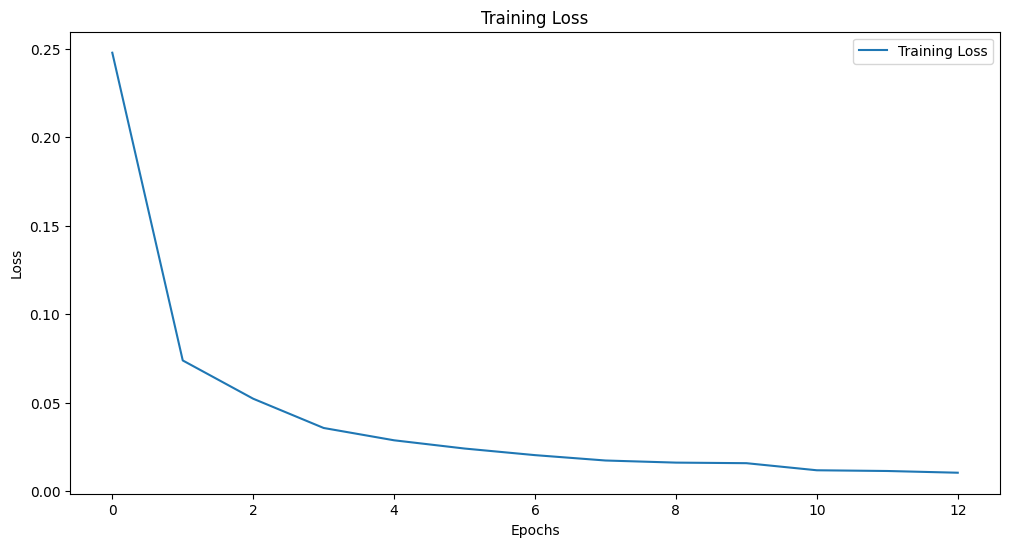

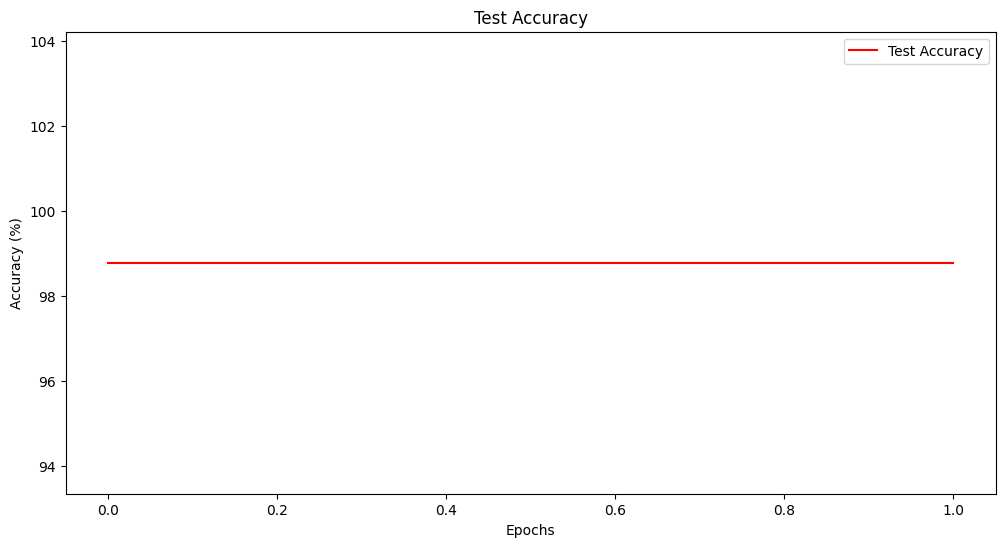

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot test accuracy
plt.figure(figsize=(12, 6))
plt.plot(test_accuracies, label='Test Accuracy', color='red')
plt.title('Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

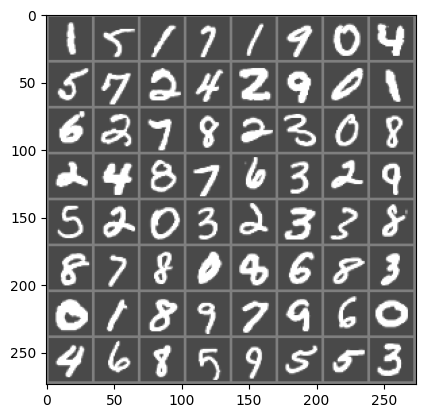

1 5 1 7 1 9 0 4 5 7 2 4 2 9 0 1 6 2 7 8 2 3 0 8 2 4 8 7 6 3 2 9 5 2 0 3 2 3 3 8 8 7 8 0 8 6 8 3 0 1 8 9 7 9 6 0 4 6 8 5 9 5 5 3


In [22]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_training_images(loader):
    # Get some random training images
    dataiter = iter(loader)
    images, labels = next(dataiter)

    # Show images
    imshow(torchvision.utils.make_grid(images[:64]))
    # Print labels
    print(' '.join(f'{labels[j].item()}' for j in range(min(64, len(labels)))))
show_training_images(train_loader)
